In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
house = pd.read_csv('train.csv')
print(house.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [10]:
print(house.shape)
print(house.describe())

(1460, 81)
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456

# Data types check

In [14]:
print("Data types:\n", house.dtypes.value_counts())

Data types:
 object     43
int64      35
float64     3
Name: count, dtype: int64


# Missing values analysis

In [15]:
missing = house.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nMissing Values:\n", missing)


Missing Values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


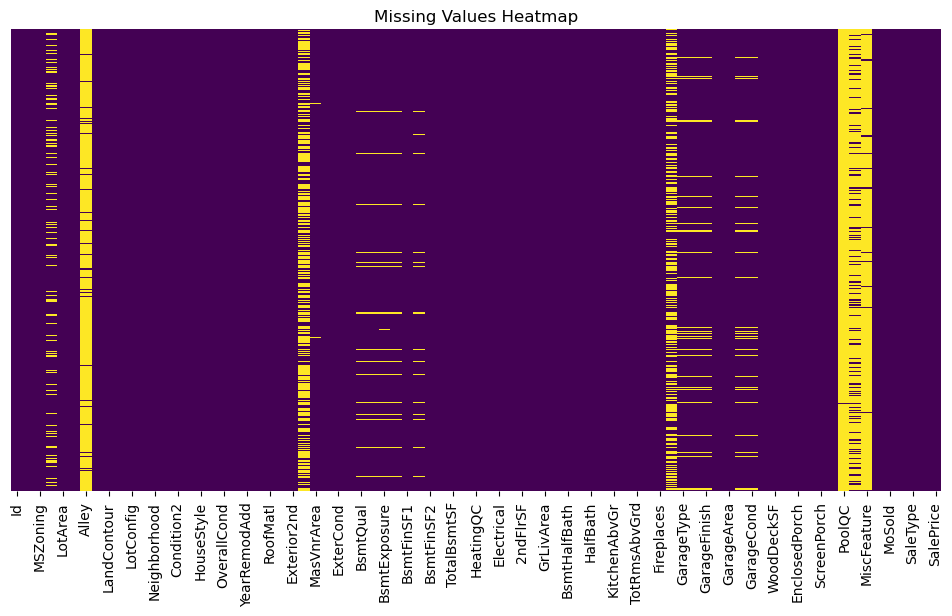

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(house.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Univariate Analysis - Numerical Features

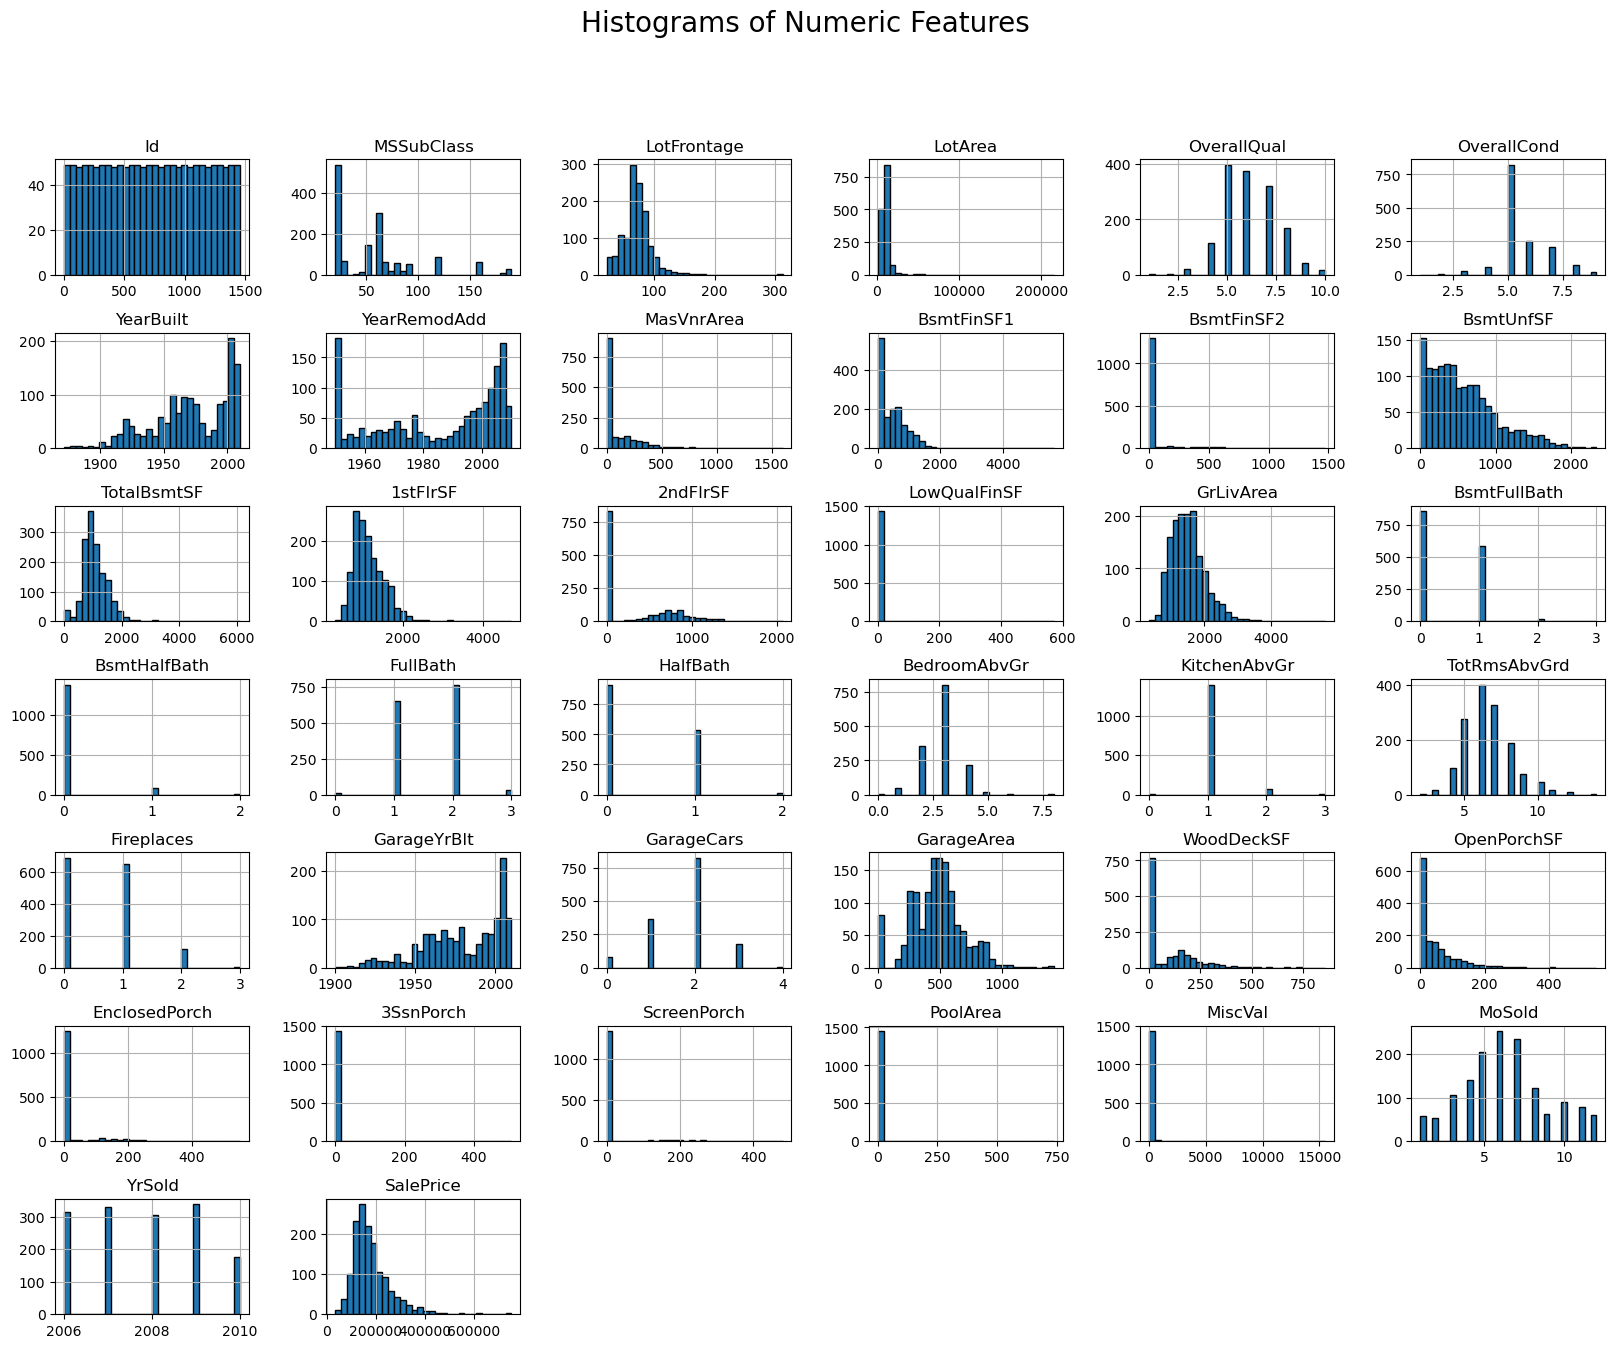

In [24]:
num_cols = house.select_dtypes(include=['int64', 'float64']).columns
house[num_cols].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=20)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

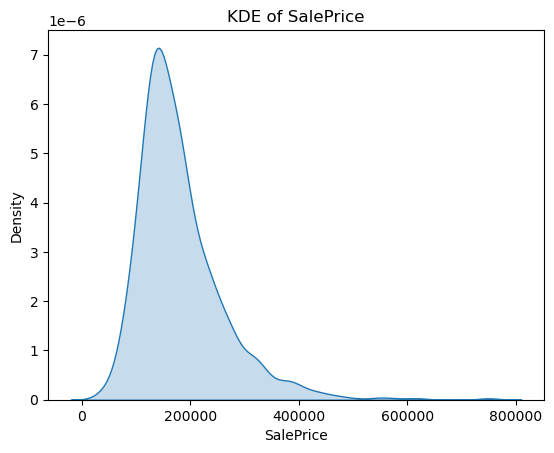

In [27]:
# KDE for SalePrice
sns.kdeplot(house['SalePrice'], fill=True)
plt.title('KDE of SalePrice')
plt.xlabel('SalePrice')
plt.show()

# Outlier Detection (SalePrice)

In [28]:
Q1 = house['SalePrice'].quantile(0.25)
Q3 = house['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
outliers = house[(house['SalePrice'] < (Q1 - 1.5 * IQR)) | (house['SalePrice'] > (Q3 + 1.5 * IQR))]
print(f"Number of SalePrice outliers: {len(outliers)}")

Number of SalePrice outliers: 61


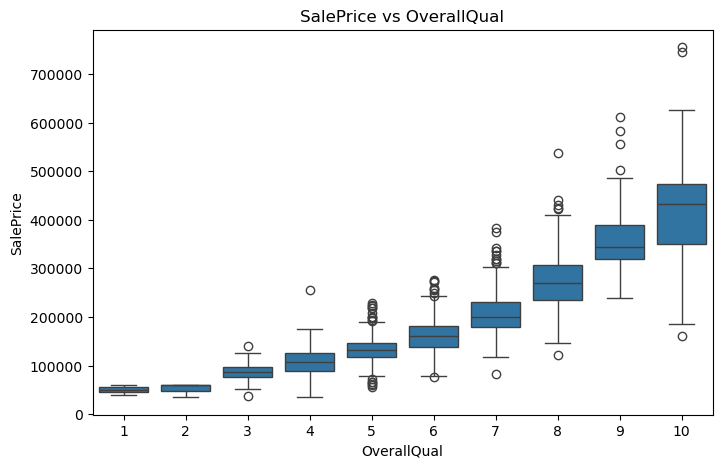

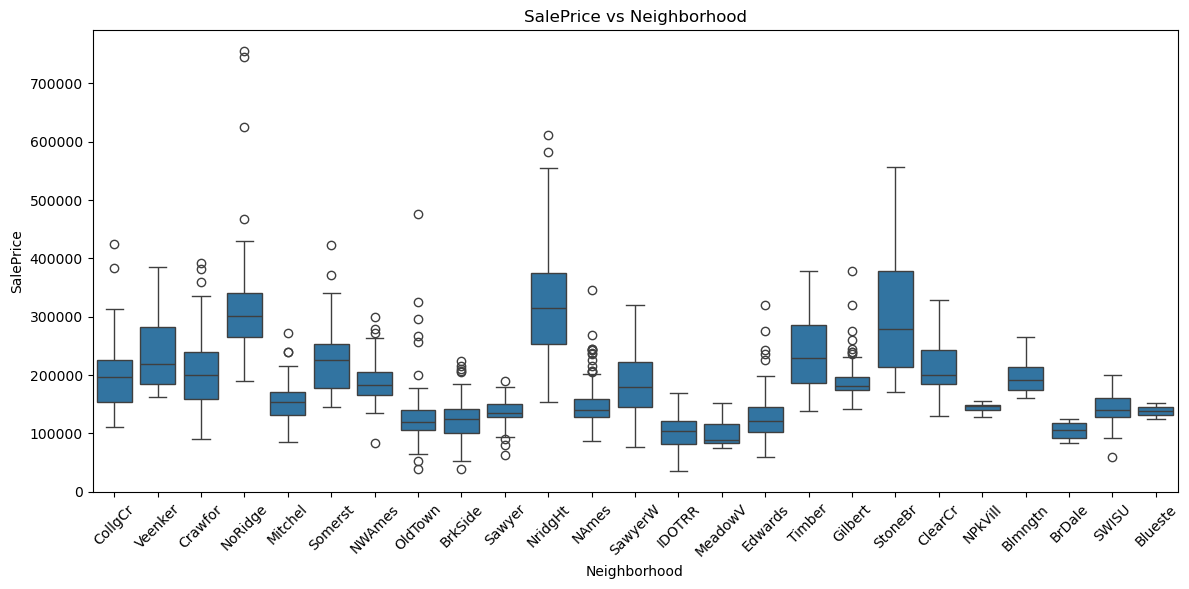

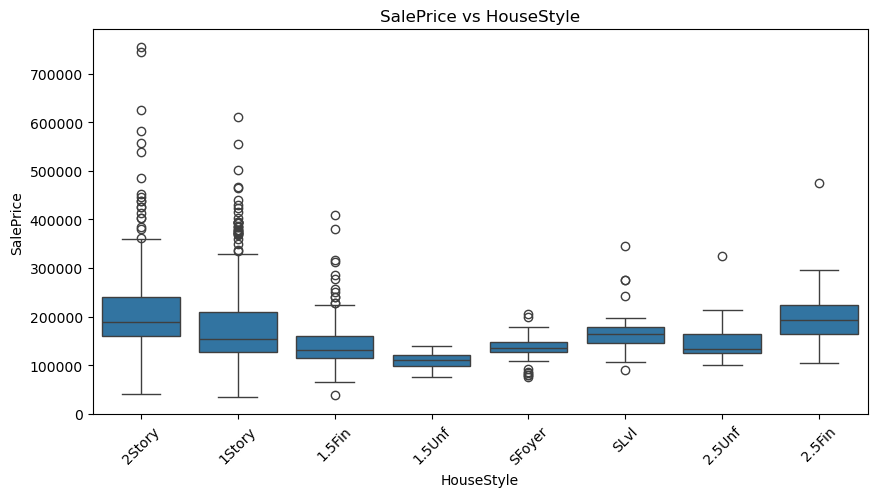

In [40]:
# Boxplot: SalePrice vs OverallQual
plt.figure(figsize=(8, 5))
sns.boxplot(x='OverallQual', y='SalePrice', data=house)
plt.title('SalePrice vs OverallQual')
plt.show()

# Boxplot: SalePrice vs Neighborhood (may be crowded)
plt.figure(figsize=(14, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=house)
plt.xticks(rotation=45)
plt.title('SalePrice vs Neighborhood')
plt.show()

# Boxplot: SalePrice vs HouseStyle
plt.figure(figsize=(10, 5))
sns.boxplot(x='HouseStyle', y='SalePrice', data=house)
plt.xticks(rotation=45)
plt.title('SalePrice vs HouseStyle')
plt.show()

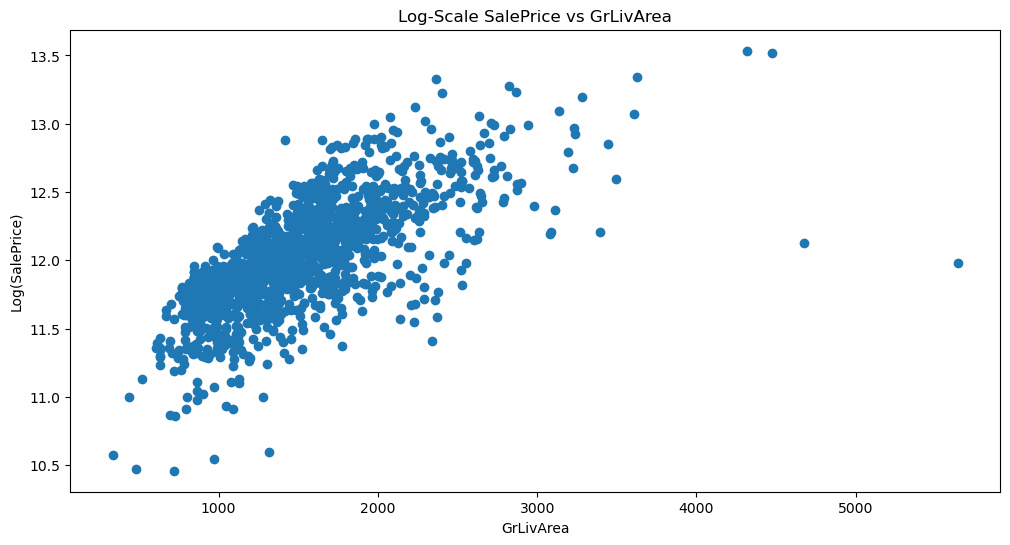

In [31]:
# Log-scale scatterplot of GrLivArea vs SalePrice
plt.figure(figsize=(12, 6))
plt.scatter(house['GrLivArea'], np.log(house['SalePrice']))
plt.xlabel('GrLivArea')
plt.ylabel('Log(SalePrice)')
plt.title('Log-Scale SalePrice vs GrLivArea')
plt.show()


# Correlation Analysis

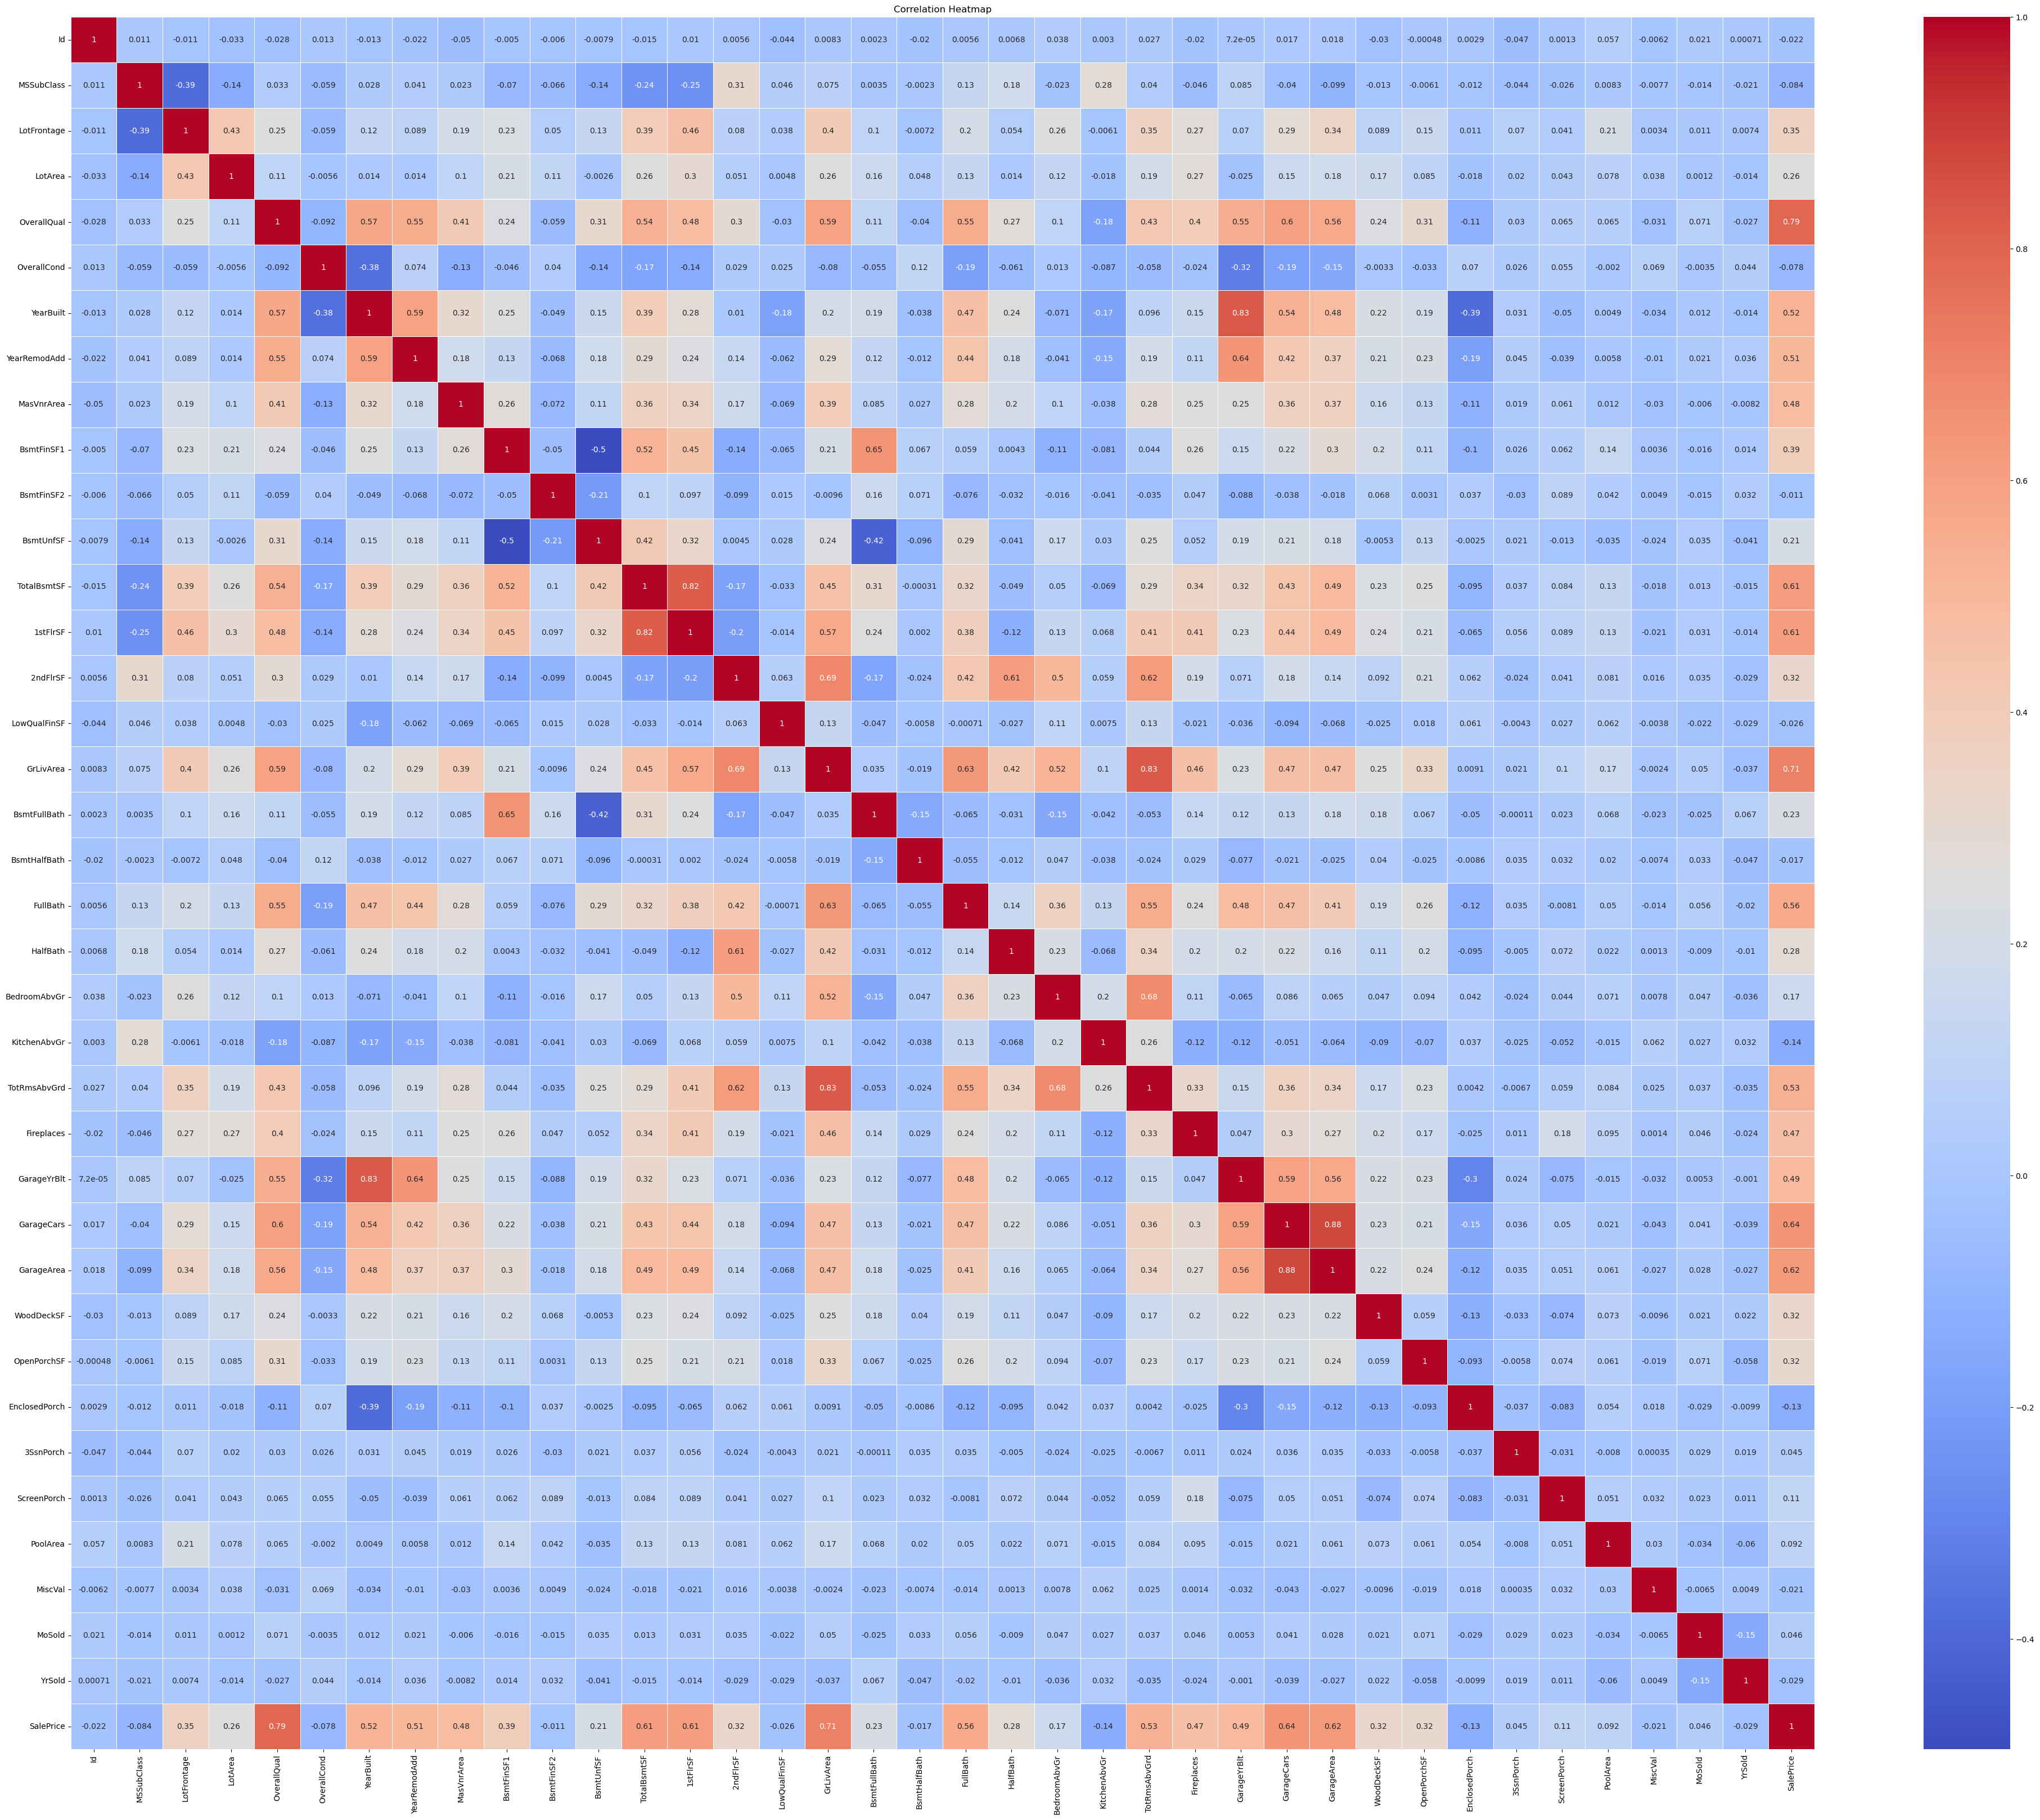

In [34]:
corr = house.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(50, 40))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Top correlated features with SalePrice
top_corr = corr['SalePrice'].abs().sort_values(ascending=False)[1:11]
print("\nTop 10 correlated features with SalePrice:\n", top_corr)



Top 10 correlated features with SalePrice:
 OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


# Categorical Variable Exploration (Bar plots)

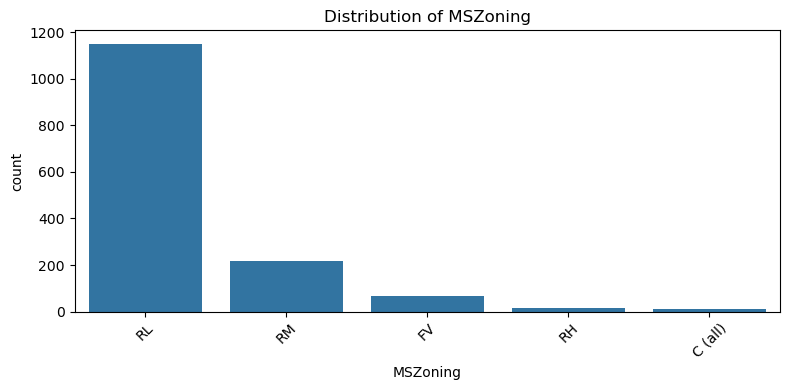

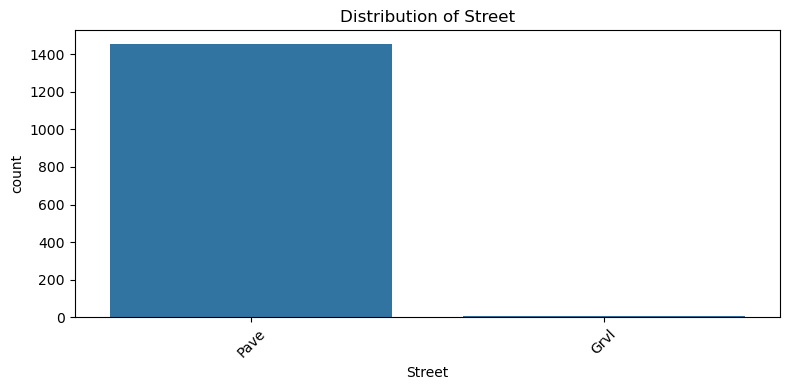

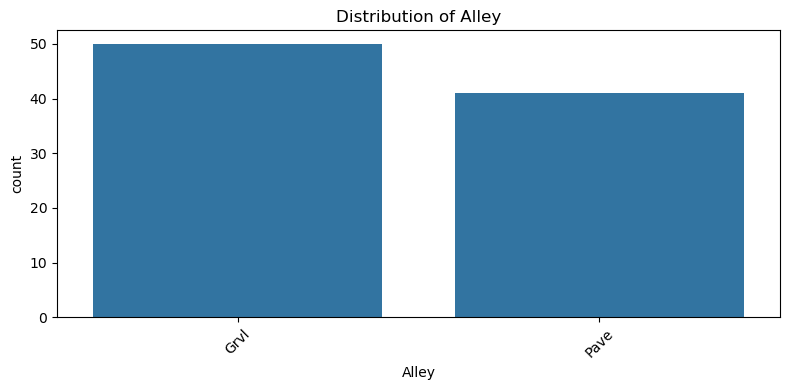

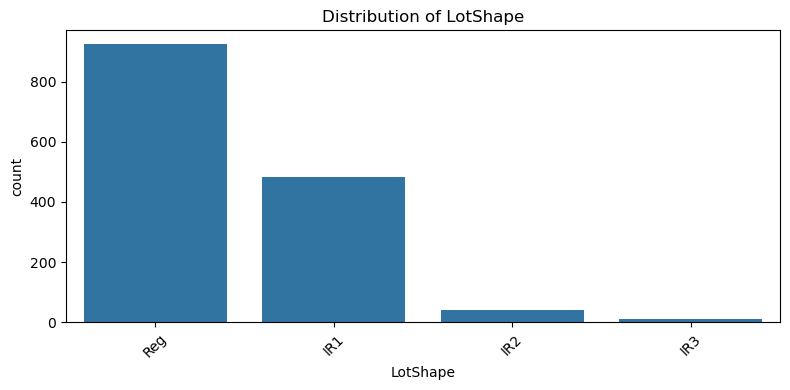

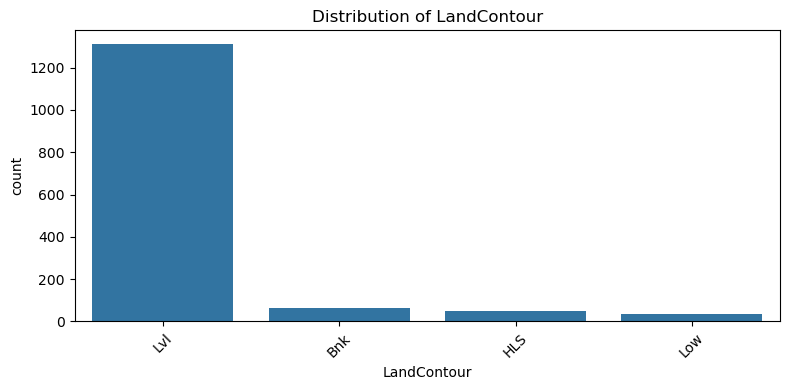

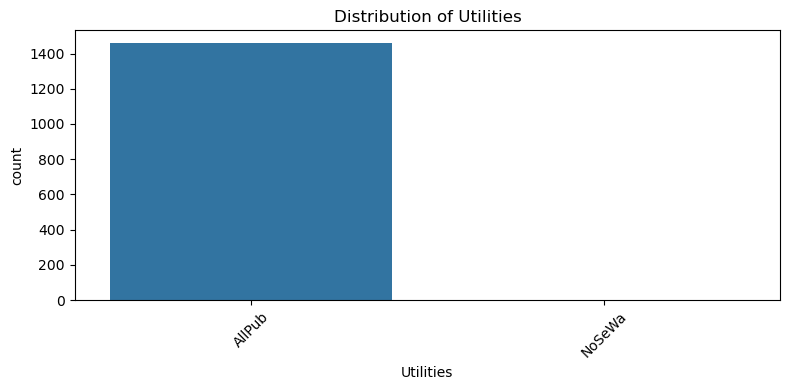

In [37]:
cat_cols = house.select_dtypes(include='object').columns
for col in cat_cols[:6]: # Limiting to first 6 for demonstration
    plt.figure(figsize=(8, 4))
    sns.countplot(data=house, x=col, order=house[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Relationship Exploration (Violin plots for categorical vs SalePrice)

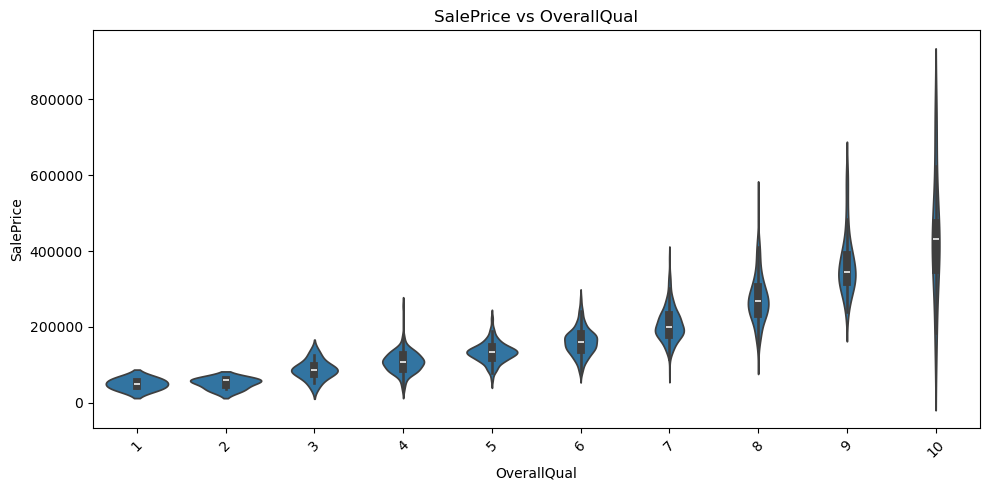

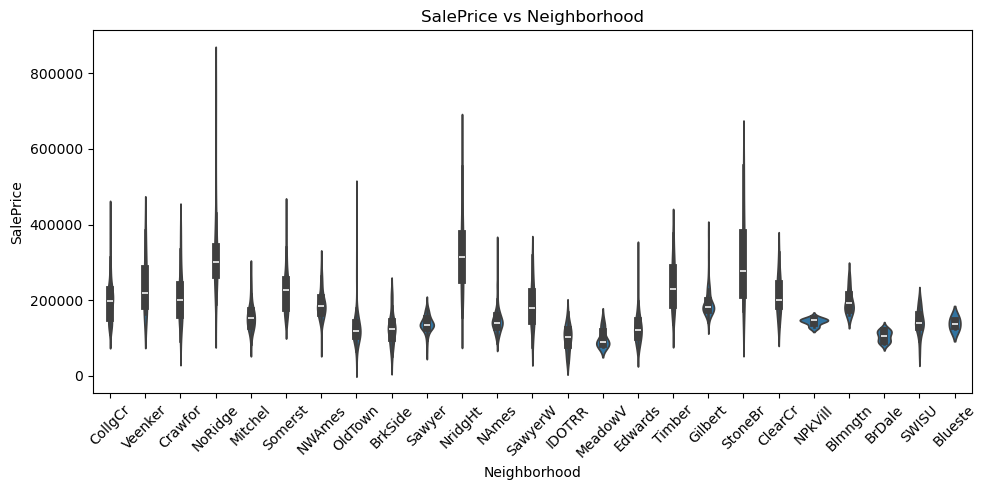

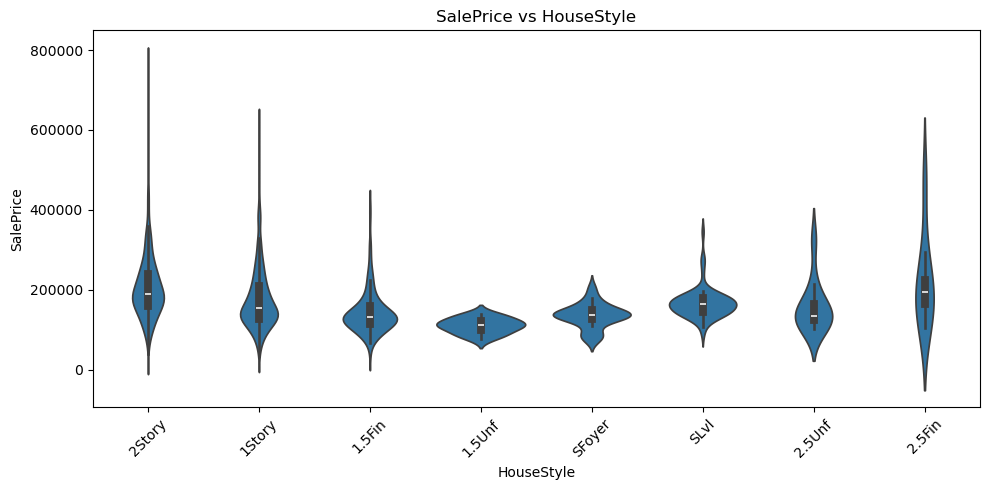

In [39]:
important_cats = ['OverallQual', 'Neighborhood', 'HouseStyle']
for col in important_cats:
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=house, x=col, y='SalePrice')
    plt.title(f'SalePrice vs {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()